In [1]:
import sys
sys.path.append("../src")

from CSOWP_SR import *
from ExpressionTree import *
from rollingWindow import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
def t1(X):
    return 10*np.exp(-0.5*np.exp(-0.5*X + 2))
X1 = np.linspace(-5, 15, 140)
y1 = t1(X1)

def t2(X):
    return np.exp(-X)
X2 = np.linspace(1, 20, 140)
y2 = t2(X2)

air_passengers = pd.read_csv("data/AirPassengers.csv")
X3 = air_passengers.index
y3 = air_passengers["#Passengers"]

treated_seco = pd.read_csv("data/treated_seco.csv")
treated_seco

treated_seco["eventdate"] = pd.to_datetime(treated_seco["eventdate"])
treated_seco.set_index("eventdate", inplace=True, drop=True)
treated_seco = treated_seco.asfreq("7D")
treated_seco.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)

X4 = treated_seco.weeks[::2]
y4 = treated_seco.value[::2]

data = [
    [X1, y1],
    [X2, y2],
    [X3, y3],
    [X4, y4]
]

In [3]:
len(X4)

428

In [4]:
treated_seco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 856 entries, 2005-01-01 to 2021-05-22
Freq: 7D
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weeks       856 non-null    int64  
 1   period      856 non-null    object 
 2   subsystem   856 non-null    object 
 3   value       856 non-null    float64
 4   dimension   856 non-null    object 
 5   category    856 non-null    object 
 6   state       0 non-null      float64
 7   planttype   0 non-null      float64
 8   plantname   0 non-null      float64
 9   reservoir   0 non-null      float64
 10  hidrobasin  0 non-null      float64
dtypes: float64(6), int64(1), object(4)
memory usage: 80.2+ KB


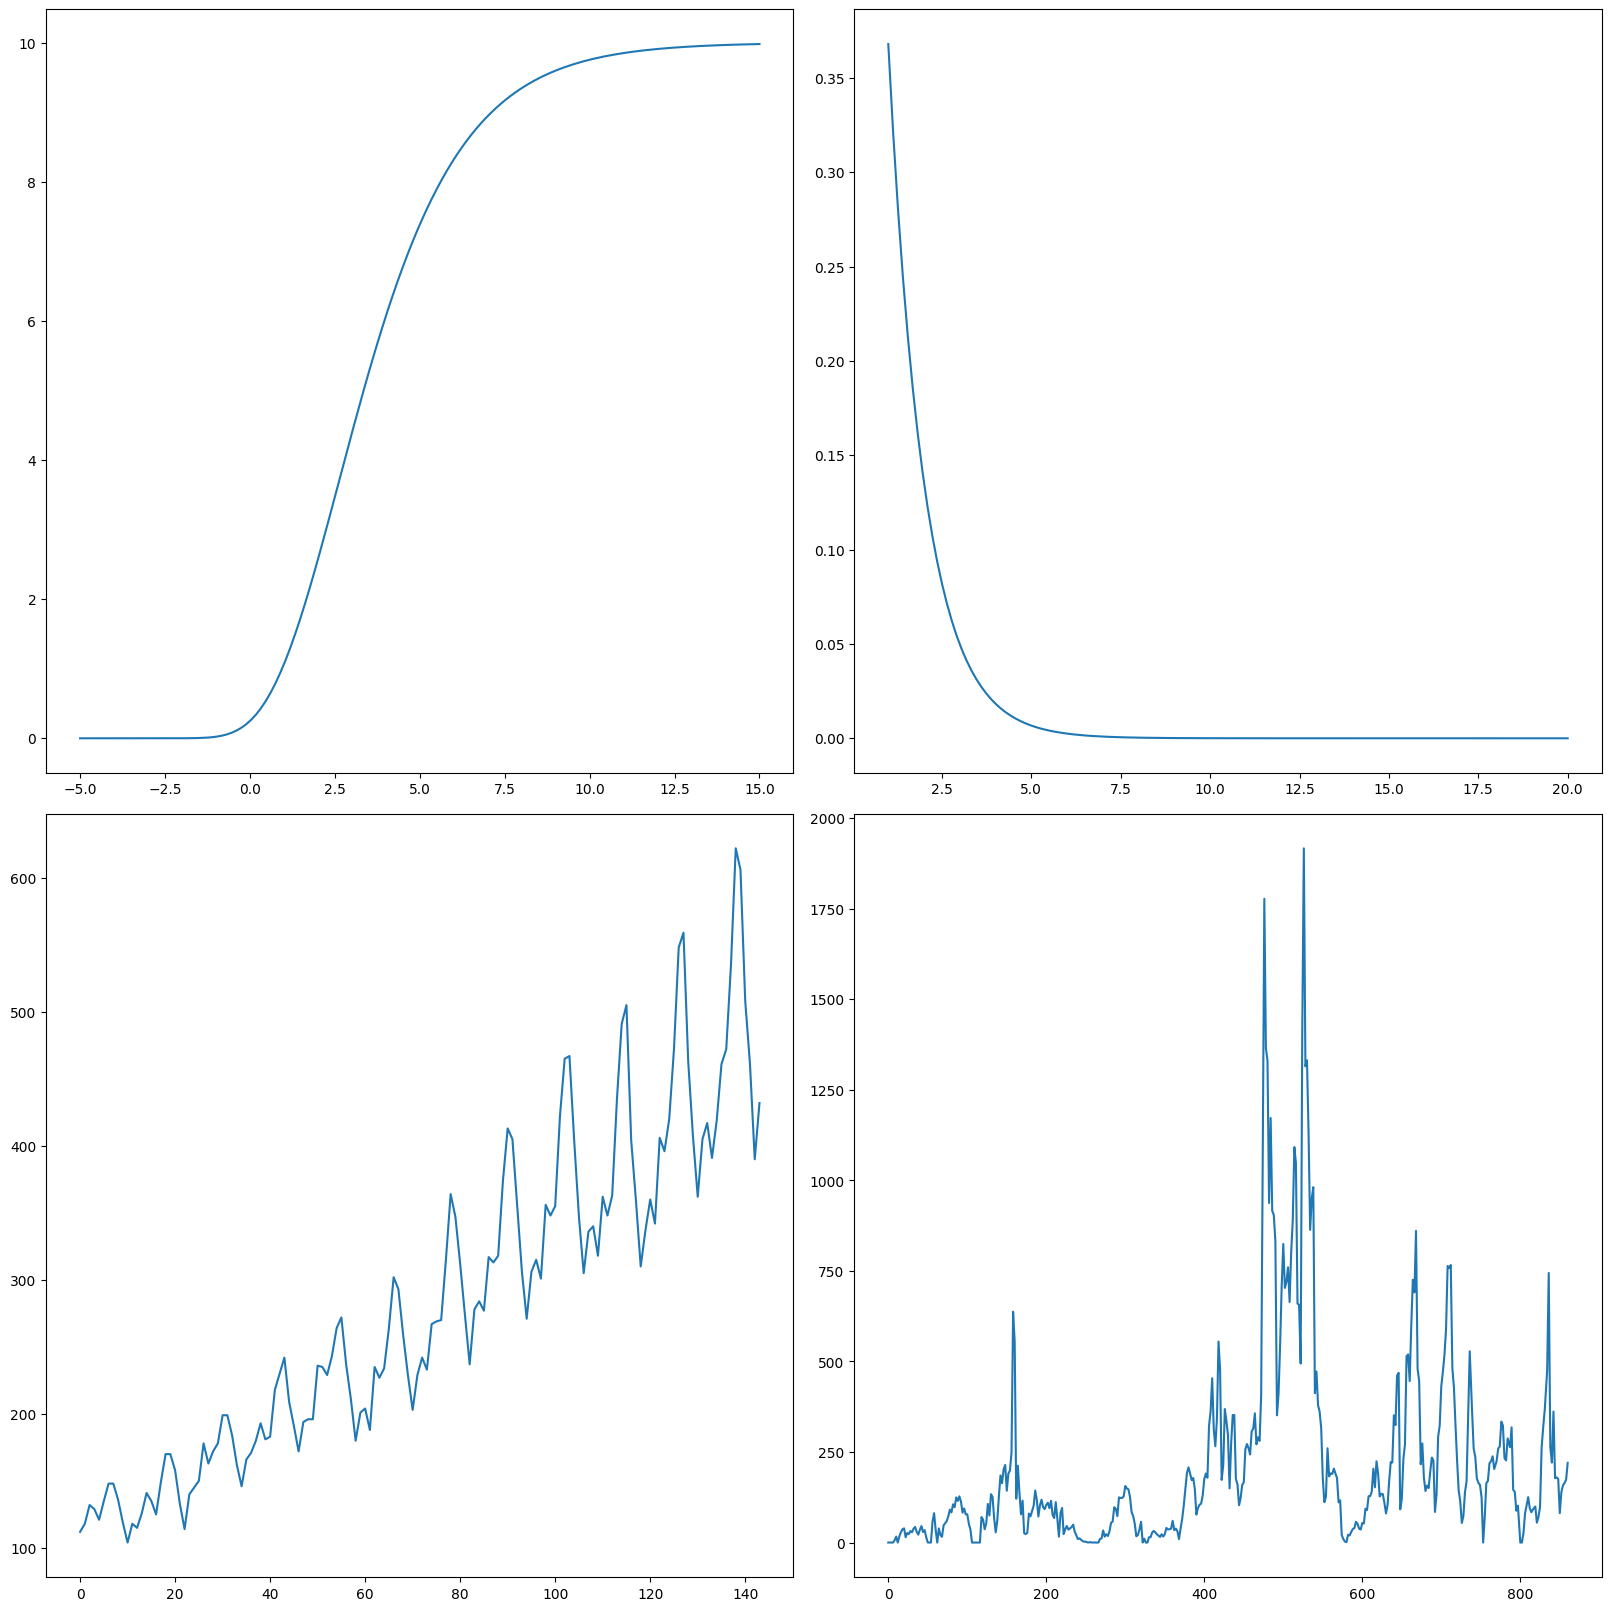

In [5]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 16))

for ax, current_data in zip(axs.flatten(), data):
    ax.plot(current_data[0], current_data[1])

In [6]:
pyreg = PySRRegressor(
    unary_operators=["exp"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
)

# pyreg.fit(np.c_[X1], y1)

In [7]:
len(X2)

140

(140,)


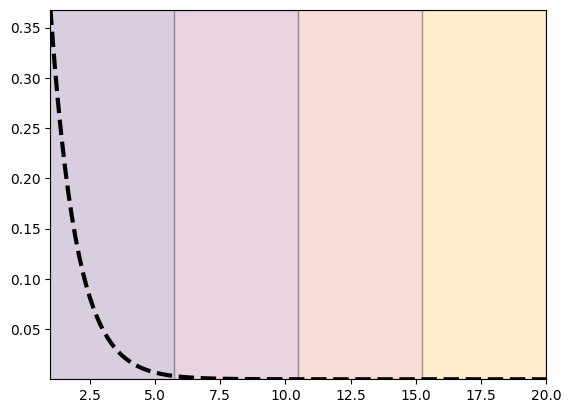

<Figure size 640x480 with 0 Axes>

In [10]:
class rollingSR():
    def __init__(self):
        self.SR = PySRRegressor(
            unary_operators=["exp"],
            temp_equation_file=True,
            elementwise_loss="loss(prediction, target) = (prediction - target)^2",
            warm_start=False
        )

    def fit(self, X, y):
        self.SR.fit(X, y)

    def get_solutions(self):
        return self.SR.sympy().simplify()

RoWi = rollingWindow()
print(X1.shape)
RoWi.fit(X2, y2, rollingSR, nData=int(140/4), visualize=True)
# RoWi.run()
plt.savefig("presentation_figures/datalimit_rainbow_1.png", dpi=400)



# output = RoWi.SRRollingMetric("left", X2[-1], 5, n_runs=2)
# output

In [11]:
import sys
sys.path.append("../src")

import os
import pickle
from pathos.multiprocessing import ProcessingPool as Pool
from rollingWindow import rollingWindow
from copy import deepcopy
from pysr import PySRRegressor
import pandas as pd
import numpy as np

def t1(X):
    return 10*np.exp(-0.5*np.exp(-0.5*X + 2))
X1 = np.linspace(-5, 15, 140)
y1 = t1(X1)

def t2(X):
    return np.exp(-X)
X2 = np.linspace(1, 20, 140)
y2 = t2(X2)

air_passengers = pd.read_csv("data/AirPassengers.csv")
X3 = air_passengers.index
y3 = air_passengers["#Passengers"]

treated_seco = pd.read_csv("data/treated_seco.csv")
treated_seco

treated_seco["eventdate"] = pd.to_datetime(treated_seco["eventdate"])
treated_seco.set_index("eventdate", inplace=True, drop=True)
treated_seco = treated_seco.asfreq("7D")
treated_seco.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)

X4 = treated_seco.weeks[::2]
y4 = treated_seco.value[::2]

data = [
    [X1, y1],
    [X2, y2],
    [X3, y3],
    [X4, y4]
]

In [12]:
class rollingSR():
    def __init__(self):
        self.SR = PySRRegressor(
            unary_operators=["exp"],
            temp_equation_file=True,
            elementwise_loss="loss(prediction, target) = (prediction - target)^2",
            warm_start=False
        )

    def fit(self, X, y):
        self.SR.fit(X, y)

    def get_solutions(self):
        return self.SR.sympy().simplify()

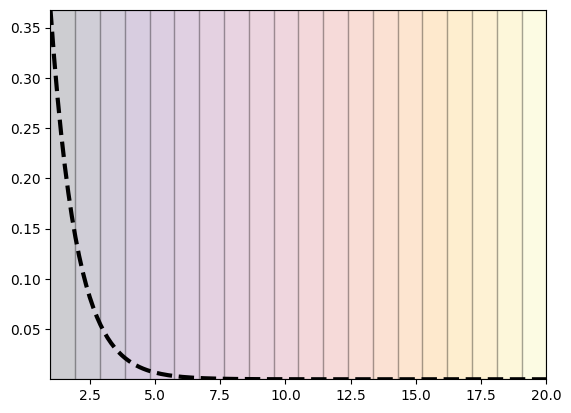

<Figure size 640x480 with 0 Axes>

In [13]:
rowi = rollingWindow()
rowi.fit(X2, y2, rollingSR, nPics = 20, visualize=True)


In [4]:
from dataLimit import *

trainR = trainRegions(rollingSR, "Outputs")
trainR.fit(X2, y2, nstart=1, nend=5, ntimes=1)
trainR.run()

2024-10-14 10:27:08,292 - root - INFO - skipping Outputs/solutions-1-0.pkl

2024-10-14 10:27:08,294 - root - INFO - skipping Outputs/solutions-2-0.pkl

2024-10-14 10:27:08,295 - root - INFO - skipping Outputs/solutions-3-0.pkl

2024-10-14 10:27:08,296 - root - INFO - skipping Outputs/solutions-4-0.pkl

2024-10-14 10:27:08,297 - root - INFO - skipping Outputs/solutions-5-0.pkl



skipping Outputs/solutions-1-0.pkl

skipping Outputs/solutions-2-0.pkl

skipping Outputs/solutions-3-0.pkl

skipping Outputs/solutions-4-0.pkl

skipping Outputs/solutions-5-0.pkl



In [50]:
list(df.keys())

[np.float64(-5.0),
 np.float64(-4.855072463768116),
 np.float64(-4.710144927536232),
 np.float64(-4.565217391304349),
 np.float64(-4.420289855072465),
 np.float64(-4.275362318840581),
 np.float64(-4.130434782608697),
 np.float64(-3.985507246376813),
 np.float64(-3.8405797101449286),
 np.float64(-3.6956521739130443),
 np.float64(-3.55072463768116),
 np.float64(-3.405797101449276),
 np.float64(-3.2608695652173916),
 np.float64(-3.1159420289855073),
 np.float64(-2.971014492753623),
 np.float64(-2.826086956521739),
 np.float64(-2.6811594202898545),
 np.float64(-2.5362318840579703),
 np.float64(-2.391304347826086),
 np.float64(-2.2463768115942018),
 np.float64(-2.1014492753623175),
 np.float64(-1.9565217391304335),
 np.float64(-1.8115942028985494),
 np.float64(-1.6666666666666654),
 np.float64(-1.5217391304347814),
 np.float64(-1.3768115942028973),
 np.float64(-1.2318840579710133),
 np.float64(-1.0869565217391293),
 np.float64(-0.9420289855072452),
 np.float64(-0.7971014492753612),
 np.floa

In [95]:
# with open("Outputs/cluster/solutions-138-0.pkl", "rb") as file:
#     solutions = pickle.load(file)

df = pd.read_pickle("Outputs/cluster/TesteData-1/solutions-69-0.pkl")
ranges = list(df.keys())

for ainter in range(len(ranges)):
    x_range = [ranges[ainter], ranges[ainter+1]]
    X_filt = X1[x_range[0] <= X1]
    print((X_filt[X_filt <= x_range[1]]))

# print(X1[X1[ranges[1] <= X1] <= ranges[2]])

[-5.         -4.85611511 -4.71223022]
[-4.56834532 -4.42446043]
[-4.28057554 -4.13669065]
[-3.99280576 -3.84892086]
[-3.70503597 -3.56115108]
[-3.41726619 -3.27338129]
[-3.1294964  -2.98561151]
[-2.84172662 -2.69784173]
[-2.55395683 -2.41007194]
[-2.26618705 -2.12230216]
[-1.97841727 -1.83453237]
[-1.69064748 -1.54676259]
[-1.4028777  -1.25899281]
[-1.11510791 -0.97122302]
[-0.82733813 -0.68345324]
[-0.53956835 -0.39568345]
[-0.25179856 -0.10791367]
[0.03597122 0.17985612]
[0.32374101 0.4676259 ]
[0.61151079 0.75539568]
[0.89928058 1.04316547]
[1.18705036 1.33093525]
[1.47482014 1.61870504]
[1.76258993 1.90647482]
[2.05035971 2.1942446 ]
[2.3381295  2.48201439]
[2.62589928 2.76978417]
[2.91366906 3.05755396]
[3.20143885 3.34532374]
[3.48920863 3.63309353]
[3.77697842 3.92086331]
[4.0647482  4.20863309]
[4.35251799 4.49640288]
[4.64028777 4.78417266]
[4.92805755 5.07194245]
[5.21582734 5.35971223]
[5.50359712 5.64748201]
[5.79136691 5.9352518 ]
[6.07913669 6.22302158]
[6.36690647 6.5107

IndexError: list index out of range

In [76]:
X_filt = X1[ranges[1] <= X1]
X_filt[X_filt <= ranges[2]]

array([-4.71223022])

In [9]:
class trainRegions():
    def __init__(self, SR_model, dir_path=None):
        self.SR_model = SR_model
        self.dir_path = dir_path

        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)

    def fit(self, X, y, nstart, nend=None, ntimes=1):
        self.X = X
        self.y = y
        self.nstart = nstart
        self.ntimes = ntimes

        if nend is None:
            self.nend = X.shape[0]
        else:
            self.nend = nend


    def run(self):
        for n in range(self.ntimes):

            for nPics in range(self.nstart, self.nend+1):
                rowi = rollingWindow()
                rowi.fit(self.X, self.y, self.SR_model, nPics = nPics)

                solutions = rowi.run()
                
                with open(self.dir_path + f"/solutions-{nPics}-{n}.pkl", "wb") as file:
                    pickle.dump(solutions, file)

    def _process_single_iteration(self, args):
        nPics, n, X, y, SR_model, dir_path = args

        rowi = rollingWindow()
        rowi.fit(X, y, SR_model, nPics=nPics)
        solutions = rowi.run()

        with open(f"{dir_path}/solutions-{nPics}-{n}.pkl", "wb") as file:
            pickle.dump(solutions, file)
    
    def run_parallel(self, n_processes=8):
        task_args = [(nPics, n, self.X, self.y, deepcopy(self.SR_model), self.dir_path)
                 for n in range(self.ntimes)
                 for nPics in range(self.nstart, self.nend + 1)]

        with Pool(processes=n_processes) as pool:
            pool.map(self._process_single_iteration, task_args)
        

In [10]:
trainR = trainRegions(rollingSR, "Outputs")
trainR.fit(X2, y2, 1, 5, 2)
trainR.run_parallel()

NameError: name 'rollingWindow' is not defined